In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
hr_df = pd.read_csv("F:/JupyterML/ML_Practice/datasets/HR_attrition.csv")

In [11]:
def alert(c):
  if c['Attrition'] == 'No':
    return 0
  else:
    return 1

In [12]:
hr_df['attrition_flag'] = hr_df.apply(alert, axis=1)

In [13]:
hr_df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition_flag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0


In [14]:
hr_df = hr_df.drop('Attrition',axis=1)

In [15]:
hr_df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'attrition_flag'],
      dtype='object')

In [16]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

In [17]:
numerical_features = ['Age', 'DailyRate','DistanceFromHome', 'Education', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','attrition_flag']

In [18]:
categorical_features = ['BusinessTravel','Department', 'EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

In [19]:
hr_label = hr_df[['attrition_flag']]
hr_label.head(4)

,attrition_flag
0,1
1,0
2,1
3,0


In [20]:
hr_cat = hr_df[categorical_features]

In [21]:
hr_num = hr_df[numerical_features]

In [22]:
hr_cat.head(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [23]:
hr_num.head(4)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition_flag
0,41,1102,1,2,1,1,2,94,3,2,...,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,...,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,80,0,8,3,3,8,7,3,0,0


In [24]:
from sklearn.base import BaseEstimator ,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,factorize =False):
        self.attribute_names = attribute_names
        self.factorize = factorize
    def fit (self ,x,y=None):
        return self
    def transform (self,x):
        selection = x[self.attribute_names]
        if self.factorize:
            selection = selection.apply(lambda p: pd.factorize(p)[0] + 1)
        return selection.values


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,LabelBinarizer,MultiLabelBinarizer
from  sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [26]:
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [27]:
num_attribs = numerical_features
cat_attribs = categorical_features
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('Labelencoder',LabelBinarizerPipelineFriendly()),
])

In [28]:
num_pipeline.fit_transform(hr_num)

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.67914568,
         0.24583399,  2.28090588],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.36871529,
         0.80654148, -0.4384223 ],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.67914568,
        -1.15593471,  2.28090588],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.67914568,
        -0.31487349, -0.4384223 ],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.67914568,
         1.08689522, -0.4384223 ],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.36871529,
        -0.59522723, -0.4384223 ]])

In [29]:
#cat_pipeline.fit_transform(hr_cat)

In [30]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [31]:
for c_feature in categorical_features:
  hr_df = create_dummies( hr_df, c_feature )

In [32]:
hr_df[0:5]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [33]:
hr_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'attrition_flag',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufactu

In [34]:
feature_columns = hr_df.columns.difference( ['attrition_flag'] )

In [35]:
feature_columns

Index(['Age', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'DailyRate',
       'Department_Research & Development', 'Department_Sales',
       'DistanceFromHome', 'Education', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'Gender_Male', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'JobSatisfaction', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime_Yes',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Stan

In [36]:
hr_df[feature_columns].head(4)

,Age,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,DailyRate,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField_Life Sciences,EducationField_Marketing,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1,1102,0,1,1,2,1,0,...,1,80,0,8,0,1,6,4,0,5
1,49,1,0,279,1,0,8,1,1,0,...,4,80,1,10,3,3,10,7,1,7
2,37,0,1,1373,1,0,2,2,0,0,...,2,80,0,7,3,3,0,0,0,0
3,33,1,0,1392,1,0,3,4,1,0,...,3,80,0,8,3,3,8,7,3,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['attrition_flag'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [39]:
train_X.shape

(1176, 47)

# Logistic regression model

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
list( zip( feature_columns, lr.coef_[0] ) )

[('Age', -0.028736798952643115),
 ('BusinessTravel_Travel_Frequently', 0.607136025822039),
 ('BusinessTravel_Travel_Rarely', -0.05072387783725459),
 ('DailyRate', -0.00024122942303007433),
 ('Department_Research & Development', -0.3436903119940432),
 ('Department_Sales', 0.2795767094112331),
 ('DistanceFromHome', 0.03162463579821673),
 ('Education', 0.05644996018663766),
 ('EducationField_Life Sciences', -0.2175385623338517),
 ('EducationField_Marketing', 0.10971039669531533),
 ('EducationField_Medical', -0.2496977665372288),
 ('EducationField_Other', -0.04985860498758962),
 ('EducationField_Technical Degree', 0.32014973075596814),
 ('EmployeeCount', 0.000609659247881363),
 ('EmployeeNumber', -5.167949104764587e-05),
 ('EnvironmentSatisfaction', -0.3371189073269845),
 ('Gender_Male', 0.28496033537009613),
 ('HourlyRate', 0.0020311036261051415),
 ('JobInvolvement', -0.431642289728878),
 ('JobLevel', -0.20112835670673862),
 ('JobRole_Human Resources', 0.08313494728842681),
 ('JobRole_Lab

In [43]:
lr.intercept_

array([0.00060966])

In [44]:
##Predicting the test cases
hr_test_pred = pd.DataFrame({'actual':test_y,'prediction':lr.predict(test_X)})

In [46]:
hr_test_pred = hr_test_pred.reset_index()
hr_test_pred.head(10)

,index,actual,prediction
0,1041,0,0
1,184,0,0
2,1222,1,0
3,67,0,0
4,220,0,0
5,494,0,0
6,430,0,0
7,240,0,0
8,218,0,0
9,49,0,0


# Creating confusion matrix

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [50]:
cm = confusion_matrix(hr_test_pred.actual,
                            hr_test_pred.prediction,[1,0])

In [51]:
cm

array([[ 16,  23],
       [  4, 251]], dtype=int64)

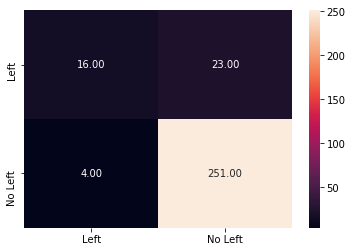

In [54]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )


In [57]:
score = accuracy_score( hr_test_pred.actual, hr_test_pred.prediction )
round( float(score), 2 )

0.91

# Predit Probability

In [58]:
test_X[:1]

,Age,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,DailyRate,Department_Research & Development,Department_Sales,DistanceFromHome,Education,EducationField_Life Sciences,EducationField_Marketing,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,0,1,866,0,1,5,3,0,0,...,4,80,0,6,4,3,5,4,1,3


In [59]:
lr.predict_proba( test_X[:1] )

array([[0.93156383, 0.06843617]])

In [60]:
predict_proba_df = pd.DataFrame( lr.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.931564,0.068436
1,0.991601,0.008399
2,0.709696,0.290304
3,0.978173,0.021827
4,0.965124,0.034876


In [61]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [63]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [65]:
hr_test_pred.head(4)

,index,actual,predicted,Left_0,Left_1
0,1041,0,0,0.931564,0.068436
1,184,0,0,0.991601,0.008399
2,1222,1,0,0.709696,0.290304
3,67,0,0,0.978173,0.021827


In [67]:
auc_score = roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

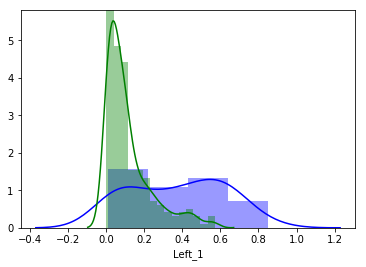

In [69]:
sns.distplot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sns.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

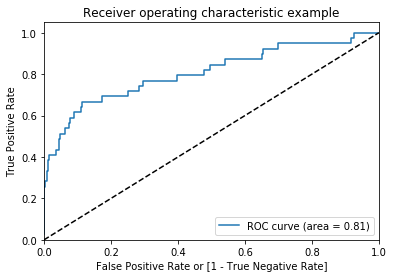

In [75]:
fpr, tpr, thresholds = roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [76]:
thresholds[0:10]

array([0.85221017, 0.72058999, 0.69321821, 0.68778414, 0.67652257,
       0.65610314, 0.63641741, 0.62602724, 0.58227716, 0.57266796])

In [77]:
fpr[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [78]:
tpr[0:10]

array([0.02564103, 0.05128205, 0.07692308, 0.1025641 , 0.12820513,
       0.15384615, 0.17948718, 0.20512821, 0.23076923, 0.25641026])

In [90]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]#0.7 THRESHOLD CHOSEN FROM PLOT

In [91]:
round( float( cutoff_prob ), 2 )

0.21

# Predicting with new cut-off probability

In [92]:
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.21 else 0 )

In [93]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,1041,0,0,0.931564,0.068436,0
1,184,0,0,0.991601,0.008399,0
2,1222,1,0,0.709696,0.290304,1
3,67,0,0,0.978173,0.021827,0
4,220,0,0,0.965124,0.034876,0
5,494,0,0,0.781925,0.218075,1
6,430,0,0,0.685582,0.314418,1
7,240,0,0,0.956645,0.043355,0
8,218,0,0,0.883440,0.116560,0
9,49,0,0,0.980952,0.019048,0


Text(0.5,15,'Predicted label')

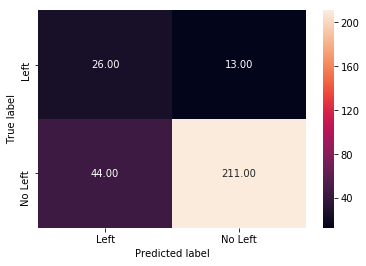

In [94]:
cm = confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Building Decision Tree

In [96]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {'max_depth': np.arange(3, 10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
tree.best_params_

{'max_depth': 3}

In [99]:
tree.best_score_

0.8418367346938775

In [100]:
clf_tree = DecisionTreeClassifier( max_depth = 9 )
clf_tree.fit( train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
tree_test_pred  = pd.DataFrame({'actual':test_y,'prediction':clf_tree.predict(test_X)})

In [106]:
tree_test_pred .head(5)

,actual,prediction
1041,0,0
184,0,0
1222,1,1
67,0,0
220,0,0


In [108]:
accuracy_score( tree_test_pred.actual, tree_test_pred.prediction )

0.8027210884353742

Text(0.5,15,'Predicted label')

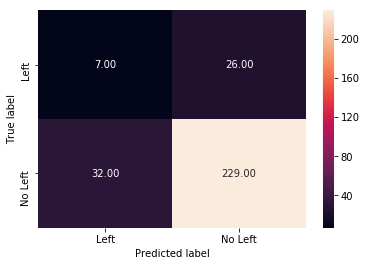

In [111]:
tree_cm = metrics.confusion_matrix( tree_test_pred.prediction,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [116]:
from sklearn.ensemble import RandomForestClassifier
radm_clf = RandomForestClassifier()
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [118]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8673469387755102

Text(0.5,15,'Predicted label')

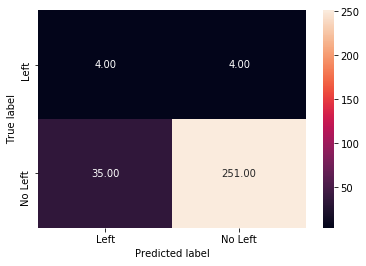

In [120]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [121]:
radm_clf.feature_importances_

array([0.04310644, 0.01512563, 0.00371638, 0.06716132, 0.00796569,
       0.00890299, 0.03238543, 0.01699861, 0.00475507, 0.00565567,
       0.00981142, 0.00342589, 0.00751199, 0.        , 0.04788873,
       0.03061697, 0.00511171, 0.0418366 , 0.02095309, 0.03016409,
       0.00265154, 0.00543372, 0.00225794, 0.00077891, 0.00039973,
       0.00596157, 0.00631448, 0.01123805, 0.02050373, 0.0049107 ,
       0.01589801, 0.07655496, 0.04361339, 0.02316629, 0.06723896,
       0.03846491, 0.00348659, 0.01778762, 0.        , 0.03944134,
       0.04190762, 0.02618051, 0.02266206, 0.03242769, 0.0256617 ,
       0.02680195, 0.03516231])

In [122]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [123]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

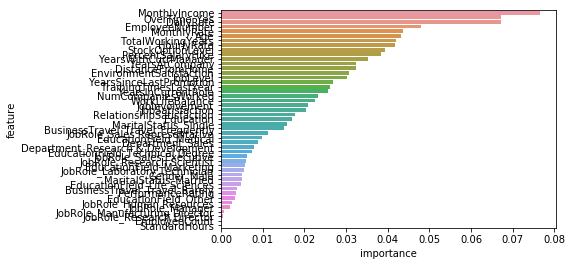

In [125]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

# Grid Search For Optimal Parameters

In [126]:
tuned_parameters = [{'max_depth': [5,10,15],
                   'n_estimators': [10,50,100],
                   'max_features': [0.1,0.3,0.5]}]

In [127]:
radm_clf = RandomForestClassifier()

clf = GridSearchCV(radm_clf,
                 tuned_parameters,
                 cv=5,
                 scoring='roc_auc')

clf.fit(train_X, train_y )

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [5, 10, 15], 'n_estimators': [10, 50, 100], 'max_features': [0.1, 0.3, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [128]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.5, 'n_estimators': 100}

In [129]:
clf.best_score_

0.8146114666431722

In [130]:
radm_clf = RandomForestClassifier( max_depth = 5,
                                max_features = 0.5,
                                n_estimators = 100)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                              'predicted': radm_clf.predict( test_X ) } )

In [132]:
metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted )

0.5453996983408749

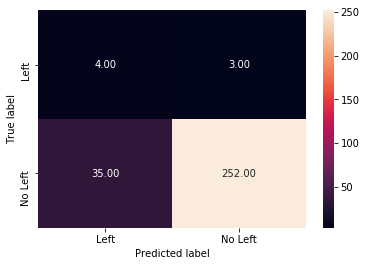

In [133]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted, 
                                   radm_test_pred.actual, 
                                   [1,0] )
sns.heatmap(tree_cm, annot=True,  
           fmt='.2f', 
           xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label');